In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

2.7.0


In [23]:

df = pd.read_csv("../data/Movies_Reviews.csv")

In [24]:
df.head()

,tconst,Title,startYear,Plot,primaryName,averageRating,numVotes
0,tt0000399,Jack and the Beanstalk,1902,The earliest known adaptation of the classic f...,GeorgeS.Fleming ThomasWhite EdwinS.Porter Jame...,6.1,600
1,tt0000420,Alice in Wonderland,1903,"Alice follows a large white rabbit down a ""Rab...",LewisCarroll MayClark CecilM.Hepworth Blair Pe...,6.3,2161
2,tt0000439,The Great Train Robbery,1903,The film opens with two bandits breaking into ...,GilbertM.'BronchoBilly'Anderson ScottMarble Bl...,7.3,15461
3,tt0000487,The Great Train Robbery,1903,The film opens with two bandits breaking into ...,SiegmundLubin JackFrawley EmilyLowry,7.1,352
4,tt0000488,The Land Beyond the Sunset,1912,Joe is an impoverished New York newsboy who li...,Mrs.WilliamBechtel MartinFuller WalterEdwin Do...,6.9,623


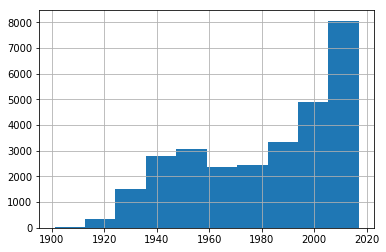

In [4]:
df["startYear"].hist( )
plt.show()

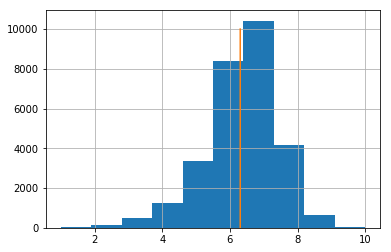

In [5]:
df["averageRating"].hist( )
avg = df["averageRating"].mean()
plt.plot(  [avg]*10000 , range(10000) )
plt.show()

# Hipotesis de los 80's

In [6]:
fig = go.Histogram2dContour(
        y = df["startYear"].values ,
        x = df["averageRating"].values
)

fig = go.Figure( data = [ fig ]  )
iplot( fig )

In [7]:

fig = go.Histogram2dContour(
        y = df["averageRating"].values ,
        x = df["numVotes"].values
)

fig = go.Figure( data = [ fig ]  )
iplot( fig )

In [8]:
y = df["startYear"].values ,
x = df["averageRating"].values

In [19]:
df1 = df[ df["startYear"] < 1980 ]
df2 = df[ df["startYear"] > 1980 ]

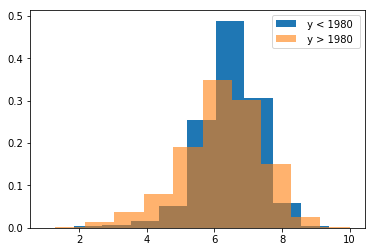

In [21]:
#df1["averageRating"].hist()
#df2["averageRating"].hist()

plt.hist( df1["averageRating"].values , density=True  )
plt.hist( df2["averageRating"].values  , alpha = 0.6 , density = True )
plt.legend( [" y < 1980" , " y > 1980 "] )
plt.show()


In [22]:
df.head()

,tconst,Title,startYear,Plot,primaryName,averageRating,numVotes
0,tt0000399,Jack and the Beanstalk,1902,The earliest known adaptation of the classic f...,GeorgeS.Fleming ThomasWhite EdwinS.Porter Jame...,6.1,600
1,tt0000420,Alice in Wonderland,1903,"Alice follows a large white rabbit down a ""Rab...",LewisCarroll MayClark CecilM.Hepworth Blair Pe...,6.3,2161
2,tt0000439,The Great Train Robbery,1903,The film opens with two bandits breaking into ...,GilbertM.'BronchoBilly'Anderson ScottMarble Bl...,7.3,15461
3,tt0000487,The Great Train Robbery,1903,The film opens with two bandits breaking into ...,SiegmundLubin JackFrawley EmilyLowry,7.1,352
4,tt0000488,The Land Beyond the Sunset,1912,Joe is an impoverished New York newsboy who li...,Mrs.WilliamBechtel MartinFuller WalterEdwin Do...,6.9,623


Name analysis

In [28]:
names = df["primaryName"].values

In [40]:
df["castLen"] = df["primaryName"].apply( lambda x :  len( x.split(" ") )   ) 

In [42]:
df["castLen"].max()

31

In [49]:
df.iloc [ df["castLen"].idxmax( axis = 1 ) ] 

tconst                                                   tt1661199
Title                                                   Cinderella
startYear                                                     2015
Plot             After losing her mother at a young age, Ella p...
primaryName      HelenaBonhamCarter HelenaBonhamCarter HelenaBo...
averageRating                                                  6.9
numVotes                                                    146265
castLen                                                         31
Name: 24292, dtype: object

In [51]:
df.iloc [ df["castLen"].idxmin( axis = 1 ) ]

tconst                                                   tt0000521
Title                                     The Little Train Robbery
startYear                                                     1905
Plot             The opening scene shows the interior of the ro...
primaryName                                         EdwinS.Porter 
averageRating                                                  5.5
numVotes                                                       223
castLen                                                          2
Name: 5, dtype: object

In [53]:
df.head()

,tconst,Title,startYear,Plot,primaryName,averageRating,numVotes,castLen
0,tt0000399,Jack and the Beanstalk,1902,The earliest known adaptation of the classic f...,GeorgeS.Fleming ThomasWhite EdwinS.Porter Jame...,6.1,600,5
1,tt0000420,Alice in Wonderland,1903,"Alice follows a large white rabbit down a ""Rab...",LewisCarroll MayClark CecilM.Hepworth Blair Pe...,6.3,2161,7
2,tt0000439,The Great Train Robbery,1903,The film opens with two bandits breaking into ...,GilbertM.'BronchoBilly'Anderson ScottMarble Bl...,7.3,15461,11
3,tt0000487,The Great Train Robbery,1903,The film opens with two bandits breaking into ...,SiegmundLubin JackFrawley EmilyLowry,7.1,352,4
4,tt0000488,The Land Beyond the Sunset,1912,Joe is an impoverished New York newsboy who li...,Mrs.WilliamBechtel MartinFuller WalterEdwin Do...,6.9,623,11


In [68]:
def mean( x ):
    x = np.array( x )
    return x.mean()

def count( x ):
    
    return len(x )
    

In [69]:
gp = df.groupby( by = "startYear" )["castLen"].agg( [ mean,  sum , max ]).reset_index()
gp2 = df.groupby( by = "startYear" )["castLen"].agg( [ count  ]).reset_index()

In [71]:
gp2.head()

,startYear,count
0,1901,4
1,1902,1
2,1903,3
3,1904,1
4,1905,2


In [66]:
fig = go.Scatter(
        x = gp["startYear"].values ,
        y = gp["mean"].values
)

fig = go.Figure( data = [ fig ]  )
iplot( fig )

In [72]:
fig = go.Scatter(
        x = gp2["startYear"].values ,
        y = gp2["count"].values
)

fig = go.Figure( data = [ fig ]  )
iplot( fig )